<a href="https://colab.research.google.com/github/crispianm/MDM3-UKCRIC/blob/main/TestingDNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os 
import sys
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing


In [83]:
#file = open('SingleSidedAmplitudeSpectrum_labelled.csv')
#file = open('LabelledMatrixTimeDomain.csv')

data = pd.read_csv("./data/data.csv")

# data['binary_order'] = data['track_number']%10
order = data['track_number']/data['total_tracks']


labels = order #data['binary_order']

columns_to_remove = ['Unnamed: 0',
                    'id',
                    'track_title',
                    'album_title',
                    'album_artist',
                    'track_number',
                    'total_tracks',
                    'order',
                    'loudness',
                    'binary_order']

data.drop(columns = columns_to_remove, axis = 1, inplace = True)

data



,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.788,0.616,9,0,0.0337,0.00286,0.549000,0.0952,0.6960,119.037,275387,4
1,0.712,0.500,9,0,0.0338,0.82500,0.314000,0.1060,0.6820,90.039,322147,4
2,0.740,0.682,9,0,0.0504,0.06920,0.530000,0.3810,0.4100,113.201,544627,4
3,0.702,0.297,10,0,0.0317,0.89400,0.485000,0.1030,0.0676,110.116,228507,4
4,0.775,0.585,10,0,0.0271,0.04220,0.619000,0.0770,0.5180,109.942,337560,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4971,0.530,0.275,2,0,0.0349,0.46000,0.000011,0.0729,0.0698,133.973,271907,4
4972,0.490,0.495,4,0,0.0338,0.17300,0.000000,0.0794,0.2300,148.967,263667,4
4973,0.767,0.355,11,1,0.0445,0.14600,0.000000,0.2980,0.2880,119.992,161893,4
4974,0.743,0.379,1,1,0.0784,0.20700,0.196000,0.1110,0.1830,127.030,412942,4


In [19]:
training_set, test_set, training_labels, test_labels = train_test_split(data, labels, test_size=0.25, random_state=42)

num_classes = len(np.unique(training_labels))

In [20]:
training_labels_categorical = to_categorical(training_labels)
test_labels_categorical = to_categorical(test_labels)
print(training_labels_categorical[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [21]:
model = Sequential()
num_features = training_set.shape[1]
model.add(Dense(128, input_dim = num_features, activation='relu'))
model.add(Dense(64, activation='relu'))

# model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu', input_dim = num_features))
# model.add(MaxPooling1D(pool_size=2))

# model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu', input_dim = num_features))
# model.add(MaxPooling1D(pool_size=2))


model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.001), metrics=['accuracy'])

history = model.fit(training_set, training_labels_categorical, epochs=20) 

Epoch 1/20
117/117 [==============================] - 3s 5ms/step - loss: 2091.3892 - accuracy: 0.0943
Epoch 2/20
117/117 [==============================] - 1s 4ms/step - loss: 398.1813 - accuracy: 0.0997
Epoch 3/20
117/117 [==============================] - 0s 4ms/step - loss: 302.3837 - accuracy: 0.0975
Epoch 4/20
117/117 [==============================] - 0s 4ms/step - loss: 254.9072 - accuracy: 0.0954
Epoch 5/20
117/117 [==============================] - 0s 4ms/step - loss: 206.8293 - accuracy: 0.1021: 0s - loss: 195.7693 - accuracy: 0.09
Epoch 6/20
117/117 [==============================] - 0s 4ms/step - loss: 178.2129 - accuracy: 0.0908
Epoch 7/20
117/117 [==============================] - 0s 4ms/step - loss: 133.8188 - accuracy: 0.1010
Epoch 8/20
117/117 [==============================] - 0s 4ms/step - loss: 192.4620 - accuracy: 0.1024
Epoch 9/20
117/117 [==============================] - 0s 4ms/step - loss: 134.5491 - accuracy: 0.1018
Epoch 10/20
117/117 [======================

In [22]:
loss, accuracy = model.evaluate(test_set, test_labels_categorical)

39/39 [==============================] - 0s 3ms/step - loss: 6.7835 - accuracy: 0.1061


Text(0, 0.5, 'loss')

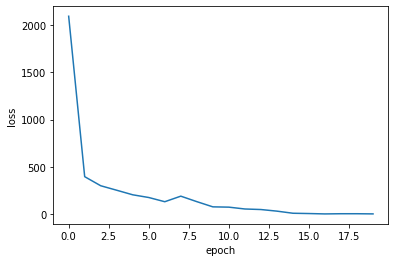

In [23]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [84]:
X = data.values
Y = labels.values

In [85]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(3483, 12) (746, 12) (747, 12) (3483,) (746,) (747,)


In [86]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(12,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])


In [87]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [88]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          validation_data=(X_val, Y_val))

Epoch 1/20
109/109 [==============================] - 1s 6ms/step - loss: 0.6955 - accuracy: 0.0037 - val_loss: 0.6954 - val_accuracy: 0.0054
Epoch 2/20
109/109 [==============================] - 1s 6ms/step - loss: 0.6937 - accuracy: 0.0135 - val_loss: 0.6937 - val_accuracy: 0.0174
Epoch 3/20
109/109 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.0215 - val_loss: 0.6934 - val_accuracy: 0.0214
Epoch 4/20
109/109 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.0238 - val_loss: 0.6931 - val_accuracy: 0.0241
Epoch 5/20
109/109 [==============================] - 1s 5ms/step - loss: 0.6931 - accuracy: 0.0250 - val_loss: 0.6930 - val_accuracy: 0.0214
Epoch 6/20
109/109 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.0281 - val_loss: 0.6932 - val_accuracy: 0.0214
Epoch 7/20
109/109 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.0258 - val_loss: 0.6932 - val_accuracy: 0.0214
Epoch 

In [89]:
model.evaluate(X_test, Y_test)[1]


24/24 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.0321


0.03212851285934448

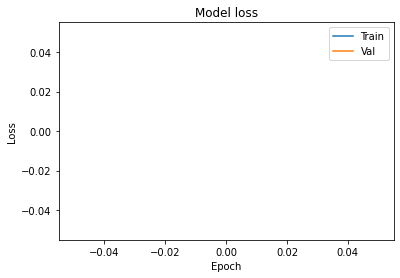

In [74]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [76]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(12,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          validation_data=(X_val, Y_val))

Epoch 1/100
109/109 [==============================] - 2s 11ms/step - loss: -46826244.0000 - accuracy: 0.1324 - val_loss: -378064192.0000 - val_accuracy: 0.1381
Epoch 2/100
109/109 [==============================] - 1s 9ms/step - loss: -9936221184.0000 - accuracy: 0.1329 - val_loss: -36709613568.0000 - val_accuracy: 0.1381
Epoch 3/100
109/109 [==============================] - 1s 11ms/step - loss: -176697556992.0000 - accuracy: 0.1329 - val_loss: -434110791680.0000 - val_accuracy: 0.1381
Epoch 4/100
109/109 [==============================] - 1s 12ms/step - loss: -1212613918720.0000 - accuracy: 0.1329 - val_loss: -2319944515584.0000 - val_accuracy: 0.1381
Epoch 5/100
109/109 [==============================] - 1s 10ms/step - loss: -4835137028096.0000 - accuracy: 0.1329 - val_loss: -7962307330048.0000 - val_accuracy: 0.1381
Epoch 6/100
109/109 [==============================] - 1s 10ms/step - loss: -14043175714816.0000 - accuracy: 0.1329 - val_loss: -20994347499520.0000 - val_accuracy: 0.

In [80]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(12,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          validation_data=(X_val, Y_val))

Epoch 1/20
109/109 [==============================] - 2s 17ms/step - loss: -113428376.0000 - accuracy: 0.1324 - val_loss: -919057088.0000 - val_accuracy: 0.1381
Epoch 2/20
109/109 [==============================] - 1s 13ms/step - loss: -27779553280.0000 - accuracy: 0.1329 - val_loss: -102234824704.0000 - val_accuracy: 0.1381
Epoch 3/20
109/109 [==============================] - 2s 14ms/step - loss: -518103433216.0000 - accuracy: 0.1329 - val_loss: -1273215057920.0000 - val_accuracy: 0.1381
Epoch 4/20
109/109 [==============================] - 1s 14ms/step - loss: -3568957915136.0000 - accuracy: 0.1329 - val_loss: -6864520609792.0000 - val_accuracy: 0.1381
Epoch 5/20
109/109 [==============================] - 1s 14ms/step - loss: -14338104492032.0000 - accuracy: 0.1329 - val_loss: -23624354365440.0000 - val_accuracy: 0.1381
Epoch 6/20
109/109 [==============================] - 1s 14ms/step - loss: -42260678836224.0000 - accuracy: 0.1329 - val_loss: -63195439955968.0000 - val_accuracy: 0